In [6]:
# NEVER USE: ECB is not secure!
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
# Alice and Bob's Shared Key
test_key = bytes.fromhex('00112233445566778899AABBCCDDEEFF')

aesCipher1 = Cipher(algorithms.AES(test_key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor1 = aesCipher1.encryptor()
aesDecryptor1 = aesCipher1.decryptor()

aesCipher2 = Cipher(algorithms.AES(test_key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor2 = aesCipher2.encryptor()
aesDecryptor2 = aesCipher2.decryptor()

message1 = b"""
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-1-1

Meet me today at the docks at 2300."""

message2 = b"""
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-1-1

Meet me today at the town square at 1130."""

message1 += b"E" * (-len(message1) % 16)
ciphertext1 = aesEncryptor1.update(message1)

# Convert to hexadecimal
hex_ciphertext1 = ciphertext1.hex()

message2 += b"E" * (-len(message2) % 16)
ciphertext2 = aesEncryptor2.update(message2)

# Convert to hexadecimal
hex_ciphertext2 = ciphertext2.hex()

# Print 16 hexadecimal values per line
for i in range(0, len(hex_ciphertext2), 32): # 32 characters = 16 bytes
    print(f"MSG1 {hex_ciphertext1[i:i+32]}")
    print(f"MSG2 {hex_ciphertext2[i:i+32]}")
    print("*****************")

MSG1 0aee9b602c574044778d4f6de3481cb9
MSG2 0aee9b602c574044778d4f6de3481cb9
*****************
MSG1 0f3b683d1af60ed69396949eaf293eb2
MSG2 0f3b683d1af60ed69396949eaf293eb2
*****************
MSG1 44760fa0bb791339d557b43b250ac27c
MSG2 44760fa0bb791339d557b43b250ac27c
*****************
MSG1 8430e159229e4bf5c7b39fe1fb72cfab
MSG2 8430e159229e4bf5c7b39fe1fb72cfab
*****************
MSG1 a5c7412fda6ac67fe63093168f474913
MSG2 a5c7412fda6ac67fe63093168f474913
*****************
MSG1 dbd386db053613be242c6059539f93da
MSG2 699f1cd5adbeb94b80980a0860ead320
*****************
MSG1 800d3ece3b12931be974f36ef5da4342
MSG2 a8ff0ed2ca9b80908757f8c3ecbc9b0d
*****************
MSG1 
MSG2 9ff8e0d822c75122aa6df1fa6aa2be71
*****************


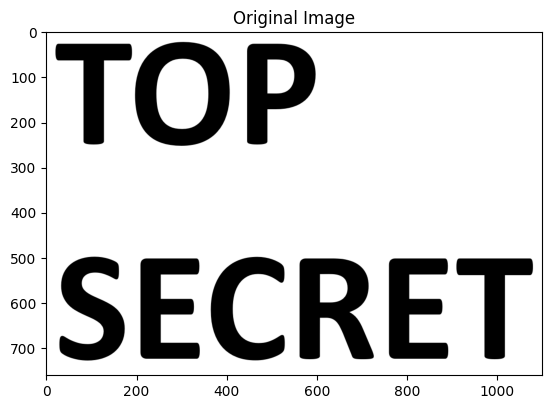

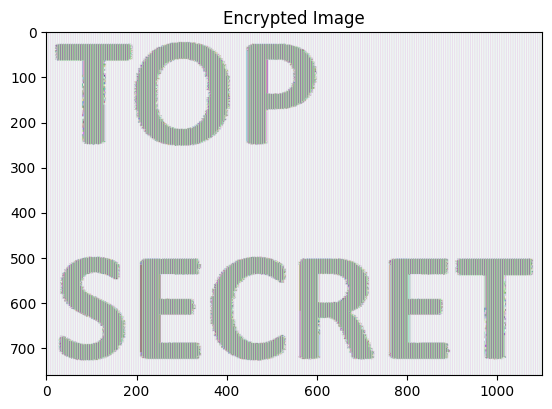

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding

# Load and display the original image
im = Image.open("media/top_secret.png")
plt.imshow(im)
plt.title("Original Image")
plt.show()

# Convert image to byte array
im_byte_arr = np.array(im).tobytes()

# Pad the byte array to be a multiple of 16
padder = padding.PKCS7(128).padder()  # 128 bit = 16 bytes
padded_data = padder.update(im_byte_arr) + padder.finalize()

# Encrypt the image data
test_key = bytes.fromhex('00112233445566778899AABBCCDDEEFF')
cipher = Cipher(algorithms.AES(test_key), modes.ECB(), backend=default_backend())
encryptor = cipher.encryptor()
ciphertext = encryptor.update(padded_data) + encryptor.finalize()

# Convert the encrypted data back to an image (same shape as original) and display it
encrypted_im = Image.frombytes("RGBA", im.size, ciphertext)  # replace "RGBA" with your image's mode if different
plt.imshow(encrypted_im)
plt.title("Encrypted Image")
plt.show()